## Observations and Insights 

In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse = pd.merge(mouse_metadata, study_results,how="inner",on="Mouse ID")
# Display the data table for preview
combined_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mcount = combined_mouse["Mouse ID"].count()

mcount

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupe = combined_mouse[combined_mouse.duplicated(["Mouse ID","Timepoint"])]
mouse_dupe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupe = combined_mouse[combined_mouse.duplicated(["Mouse ID"])]
all_dupe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = combined_mouse.drop_duplicates("Mouse ID")
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [14]:
# Checking the number of mice in the clean DataFrame.
clean_mcount = clean_mouse["Mouse ID"].count()

clean_mcount

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combined_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = combined_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combined_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean":mean, "Median":median,"Variance":var,"Standard Deviation":std,"SEM":sem})

summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
combined_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate({np.mean,np.median,np.var,np.std,st.sem})

,median,var,std,mean,sem
Drug Regimen,,,,,
Capomulin,41.557809,24.947764,4.994774,40.675741,0.329346
Ceftamin,51.776157,39.290177,6.268188,52.591172,0.469821
Infubinol,51.820584,43.128684,6.567243,52.884795,0.492236
Ketapril,53.698743,68.553577,8.279709,55.235638,0.603860
Naftisol,52.509285,66.173479,8.134708,54.331565,0.596466
Placebo,52.288934,61.168083,7.821003,54.033581,0.581331
Propriva,50.854632,42.351070,6.507770,52.322552,0.512884
Ramicane,40.673236,23.486704,4.846308,40.216745,0.320955
Stelasyn,52.431737,59.450562,7.710419,54.233149,0.573111


## Bar and Pie Charts

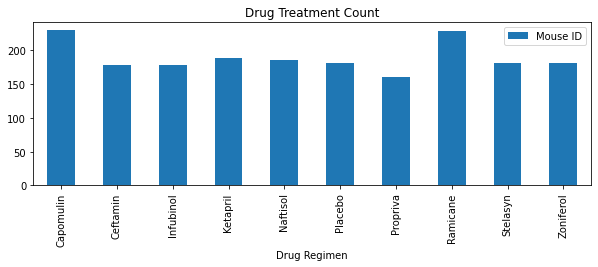

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs = pd.DataFrame(combined_mouse.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drugs[["Drug Regimen","Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df.plot(kind="bar", figsize=(10,3))
plt.title("Drug Treatment Count")
plt.show()

Text(0, 0.5, 'Count')

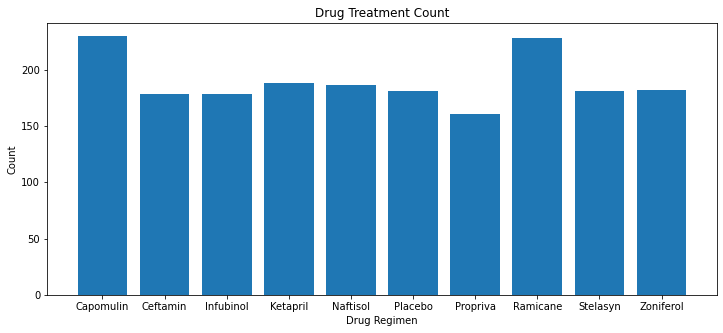

In [56]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs_list = summary.index.tolist()
cdrugs = (combined_mouse.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
plt.figure(figsize=(12,5))
plt.bar(drugs_list,cdrugs,align = 'center')

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

Text(0.5, 1.0, 'Male & Female Mice Percentage')

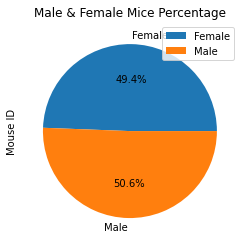

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(combined_mouse.groupby("Sex").count()).reset_index()
gender = gender[["Sex","Mouse ID"]]
gender.plot(kind = 'pie',y = "Mouse ID", labels= gender["Sex"],autopct='%1.1f%%')
plt.title("Male & Female Mice Percentage")


([<matplotlib.patches.Wedge at 0x19909109160>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Feale'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

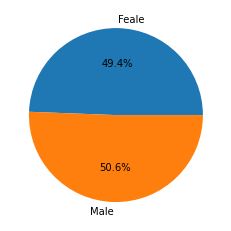

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
cgender = (combined_mouse.groupby("Sex")["Mouse ID"].count()).tolist()
labels = ['Feale','Male']
plt.pie(cgender, labels = labels,autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
combined_mouse.sort_values(["Timepoint"], ascending=False)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sorted_df = combined_mouse.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
final_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
final_df.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
125,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
126,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
127,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
128,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [101]:
capo_df = (final_df[final_df["Drug Regimen"].isin(["Capomulin"])]).reset_index()
capo_df.head()



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [106]:
capo_list = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_list = capo_list["Tumor Volume (mm3)"]   
quartiles = capo_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Tumor volume is: {lowerq}")
print(f"The upper quartile of Tumor volume is: {upperq}")
print(f"The interquartile range of Tumor volume is: {iqr}")
print(f"The median of Tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor volume is: 32.37735684
The upper quartile of Tumor volume is: 40.1592203
The interquartile range of Tumor volume is: 7.781863460000004
The median of Tumor volume is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


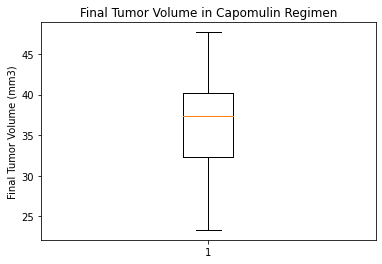

In [110]:
plt.subplots()
plt.title("Final Tumor Volume in Capomulin Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(capo_list)
plt.show()

In [111]:
ram_df = (final_df[final_df["Drug Regimen"].isin(["Ramicane"])]).reset_index()
ram_df.head()

ram_list = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]   
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Tumor volume is: {lowerq}")
print(f"The upper quartile of Tumor volume is: {upperq}")
print(f"The interquartile range of Tumor volume is: {iqr}")
print(f"The median of Tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor volume is: 30.981175224999998
The upper quartile of Tumor volume is: 38.508305307499995
The interquartile range of Tumor volume is: 7.527130082499998
The median of Tumor volume is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


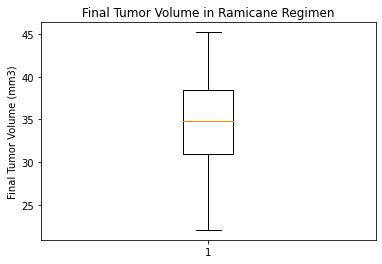

In [112]:
plt.subplots()
plt.title("Final Tumor Volume in Ramicane Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(ram_list)
plt.show()

In [113]:
Infubinol_df = (final_df[final_df["Drug Regimen"].isin(["Infubinol"])]).reset_index()
Infubinol_df.head()

Infubinol_list = Infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Infubinol_list = Infubinol_list["Tumor Volume (mm3)"]   
quartiles = Infubinol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Tumor volume is: {lowerq}")
print(f"The upper quartile of Tumor volume is: {upperq}")
print(f"The interquartile range of Tumor volume is: {iqr}")
print(f"The median of Tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor volume is: 62.75445141
The upper quartile of Tumor volume is: 67.68556862
The interquartile range of Tumor volume is: 4.9311172099999965
The median of Tumor volume is: 66.08306589
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


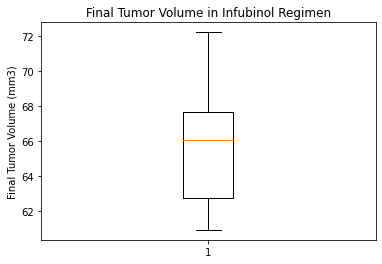

In [115]:
plt.subplots()
plt.title("Final Tumor Volume in Infubinol Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(Infubinol_list)
plt.show()

In [116]:
Ceftamin_df = (final_df[final_df["Drug Regimen"].isin(["Ceftamin"])]).reset_index()
Ceftamin_df.head()

Ceftamin_list = Ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Ceftamin_list = Ceftamin_list["Tumor Volume (mm3)"]   
quartiles = Ceftamin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Tumor volume is: {lowerq}")
print(f"The upper quartile of Tumor volume is: {upperq}")
print(f"The interquartile range of Tumor volume is: {iqr}")
print(f"The median of Tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor volume is: 61.43389223
The upper quartile of Tumor volume is: 67.52748237
The interquartile range of Tumor volume is: 6.093590140000003
The median of Tumor volume is: 64.29983003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


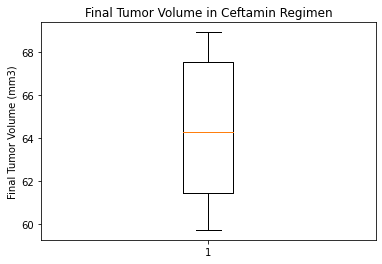

In [117]:
plt.subplots()
plt.title("Final Tumor Volume in Ceftamin Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(Ceftamin_list)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

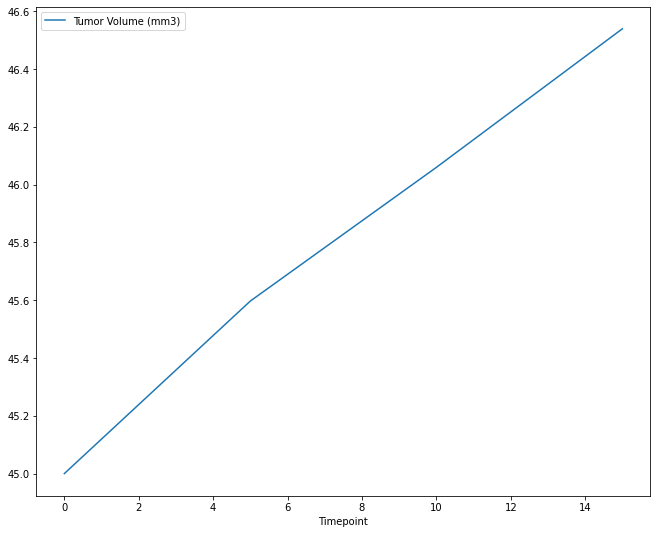

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = combined_mouse.loc[combined_mouse["Drug Regimen"] == "Capomulin"]
capo_df = capo_df.reset_index()

mouse_capo = capo_df.loc[capo_df["Mouse ID"] == "r157"]

mouse_capo = mouse_capo.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
mouse_capo.set_index("Timepoint").plot(figsize=(11,9))

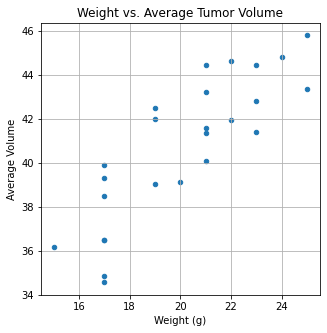

In [129]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
wtv = capo_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_wtv = pd.DataFrame(wtv.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_wtv = avg_wtv.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_wtv.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(5,5), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation is 0.8419363424694717


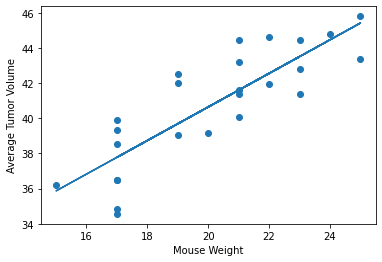

In [149]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = avg_wtv.iloc[:,1]
avg_tv = avg_wtv.iloc[:,2]
correlation = st.pearsonr(weight,avg_tv)

print(f"The correlation is {correlation[0]}")

x = avg_wtv["Weight (g)"]
y = avg_wtv["Average Volume"]
res = linregress(x, y)
regress = x * slope + intercept
plt.scatter(x, y)
plt.plot(x,regress)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()